## Assignment 

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

## Read the Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

## Cheack missing values

In [ ]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## Seprate X and Y

In [ ]:
X = df.drop(columns=['id','Product ID','Machine failure'])
Y = df[['Machine failure']]

In [ ]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [ ]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [ ]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

## Seprate cat and con from X

In [ ]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [ ]:
cat

['Type']

In [ ]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

## Preprocessing


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Create a num pipeline
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

# Create a cat pipe
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unkown')),
                           ('ordinal',OrdinalEncoder())])

# Combine the both Pipeline
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [ ]:
x_pre = pre.fit_transform(X)
x_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [ ]:
cols = pre.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [ ]:
x_pre = pd.DataFrame(x_pre,columns=cols)
x_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


## Features Selection with mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(x_pre,Y)
mi

array([0.00508098, 0.00223988, 0.01936982, 0.01986025, 0.0065467 ,
       0.00827923, 0.02420361, 0.01127278, 0.01970566, 0.00112427,
       0.01108642])

In [ ]:
mi = pd.Series(mi)
mi.index = x_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024204
num__Torque [Nm]                0.019860
num__OSF                        0.019706
num__Rotational speed [rpm]     0.019370
num__PWF                        0.011273
cat__Type                       0.011086
num__TWF                        0.008279
num__Tool wear [min]            0.006547
num__Air temperature [K]        0.005081
num__Process temperature [K]    0.002240
num__RNF                        0.001124
dtype: float64

In [ ]:
mi.index

Index(['num__HDF', 'num__Torque [Nm]', 'num__OSF',
       'num__Rotational speed [rpm]', 'num__PWF', 'cat__Type', 'num__TWF',
       'num__Tool wear [min]', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'num__RNF'],
      dtype='object')

<Axes: title={'center': 'Count plot for Mutual information'}>

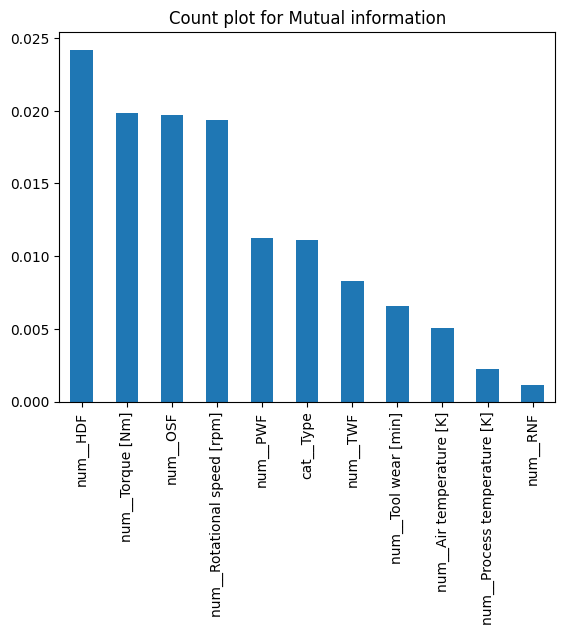

In [ ]:
mi.plot(kind='bar',title='Count plot for Mutual information')

In [ ]:
sel_col = list(mi.index[0:5])
sel_col

['num__HDF',
 'num__Torque [Nm]',
 'num__OSF',
 'num__Rotational speed [rpm]',
 'num__PWF']

In [ ]:
from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif,k=5)
sel_feature = sel.fit_transform(x_pre,Y)
sel_cols = sel.get_feature_names_out()

In [ ]:
sel

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x0000012E1D16DDA0>)

In [ ]:
sel_feature

array([[ 0.54541592, -0.49971115, -0.07202055, -0.04901642, -0.06303833],
       [ 1.72030819, -1.32302768, -0.07202055, -0.04901642, -0.06303833],
       [ 2.05187289, -1.62883096, -0.07202055, -0.04901642, -0.06303833],
       ...,
       [ 0.0264451 , -0.2174312 , -0.07202055, -0.04901642, -0.06303833],
       [-0.52856537,  0.69997864, -0.07202055, -0.04901642, -0.06303833],
       [ 0.26430672, -0.12333789, -0.07202055, -0.04901642, -0.06303833]])

In [ ]:
sel_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF'], dtype=object)

## Extract  important Columns

In [ ]:
sel_cols[0].split('__')[1]

'Rotational speed [rpm]'

In [ ]:
imp_col = []
for i in sel_cols:
    s =  i.split('__')[1]
    imp_col.append(s)

In [ ]:
imp_col

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

In [ ]:
X_sel = X[imp_col]
X_sel

,Rotational speed [rpm],Torque [Nm],HDF,PWF,OSF
0,1596,36.1,0,0,0
1,1759,29.1,0,0,0
2,1805,26.5,0,0,0
3,1524,44.3,0,0,0
4,1641,35.4,0,0,0
...,...,...,...,...,...
136424,1530,37.5,0,0,0
136425,1447,49.1,0,0,0
136426,1524,38.5,0,0,0
136427,1447,46.3,0,0,0


## Create a pipline

In [ ]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [ ]:
cat_sel

[]

In [ ]:
con_sel

['Rotational speed [rpm]', 'Torque [Nm]', 'HDF', 'PWF', 'OSF']

In [ ]:
## num pipe
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])
## cat pipe
cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

## combine
pre2 = ColumnTransformer([('num',num_pipe2,con_sel),
                          ('cat',cat_pipe2,cat_sel)])

In [ ]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

array([[ 0.54541592, -0.49971115, -0.07202055, -0.04901642, -0.06303833],
       [ 1.72030819, -1.32302768, -0.07202055, -0.04901642, -0.06303833],
       [ 2.05187289, -1.62883096, -0.07202055, -0.04901642, -0.06303833],
       ...,
       [ 0.0264451 , -0.2174312 , -0.07202055, -0.04901642, -0.06303833],
       [-0.52856537,  0.69997864, -0.07202055, -0.04901642, -0.06303833],
       [ 0.26430672, -0.12333789, -0.07202055, -0.04901642, -0.06303833]])

In [ ]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Rotational speed [rpm]', 'num__Torque [Nm]', 'num__HDF',
       'num__PWF', 'num__OSF'], dtype=object)

In [ ]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF
0,0.545416,-0.499711,-0.072021,-0.049016,-0.063038
1,1.720308,-1.323028,-0.072021,-0.049016,-0.063038
2,2.051873,-1.628831,-0.072021,-0.049016,-0.063038
3,0.026445,0.464745,-0.072021,-0.049016,-0.063038
4,0.869773,-0.582043,-0.072021,-0.049016,-0.063038
...,...,...,...,...,...
136424,0.069693,-0.335048,-0.072021,-0.049016,-0.063038
136425,-0.528565,1.029305,-0.072021,-0.049016,-0.063038
136426,0.026445,-0.217431,-0.072021,-0.049016,-0.063038
136427,-0.528565,0.699979,-0.072021,-0.049016,-0.063038


## Apply train test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.20,random_state=21)

In [ ]:
xtrain.shape

(109143, 5)

In [ ]:
xtest.shape

(27286, 5)

## Algorithem Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [ ]:
dct = {'Logistic':LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost':GradientBoostingClassifier()}

In [ ]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict train and test results
    ypred_tr =model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate F1 score in training
    f1_tr = f1_score(ytrain,ypred_tr)
    tr.append(f1_tr)
    # Calculate F1 Score in train Cross validated
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)
    # Calculate F1 score in testing
    f1_ts = f1_score(ytest, ypred_ts)
    ts.append(f1_ts)
    # Print the results for model
    print(f'Model Name : {name}\n')
    print(f'Training F1 : {f1_tr:.4f}')
    print(f'Training F1 CV : {f1_cv:.4f}')
    print(f'Testing F1 : {f1_ts:.4f}')
    print('\n=================================================\n')

Model Name : Logistic

Training F1 : 0.8010
Training F1 CV : 0.8003
Testing F1 : 0.8181


Model Name : Decision Tree

Training F1 : 0.8895
Training F1 CV : 0.7317
Testing F1 : 0.7700


Model Name : Random Forest

Training F1 : 0.8907
Training F1 CV : 0.7694
Testing F1 : 0.7969


Model Name : Gradient Boost

Training F1 : 0.8090
Training F1 CV : 0.7995
Testing F1 : 0.8158




# Create a evaluation dictionary

In [ ]:
dct.keys()

dict_keys(['Logistic', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

In [ ]:
dct.values()

dict_values([LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier()])

In [ ]:
eval_dct = {"Model Name " : list (dct.keys()),
            'train_f1' : tr,
            'train_cv' : tr_cv ,
            'test_f1' : ts}

In [ ]:
eval_dct

{'Model Name ': ['Logistic',
  'Decision Tree',
  'Random Forest',
  'Gradient Boost'],
 'train_f1': [np.float64(0.8009708737864077),
  np.float64(0.8895311496467566),
  np.float64(0.8907242693773825),
  np.float64(0.8089500860585198)],
 'train_cv': [np.float64(0.8002792857460701),
  np.float64(0.7317416823737746),
  np.float64(0.7694468445317079),
  np.float64(0.7994543708623273)],
 'test_f1': [np.float64(0.8180574555403557),
  np.float64(0.770012706480305),
  np.float64(0.7968545216251638),
  np.float64(0.8158253751705321)]}

In [ ]:
eval_df = pd.DataFrame(eval_dct)
eval_df

,Model Name,train_f1,train_cv,test_f1
0,Logistic,0.800971,0.800279,0.818057
1,Decision Tree,0.889531,0.731742,0.770013
2,Random Forest,0.890724,0.769447,0.796855
3,Gradient Boost,0.808950,0.799454,0.815825


In [ ]:
eval_df.sort_values(by='test_f1', ascending=False)

,Model Name,train_f1,train_cv,test_f1
0,Logistic,0.800971,0.800279,0.818057
3,Gradient Boost,0.808950,0.799454,0.815825
2,Random Forest,0.890724,0.769447,0.796855
1,Decision Tree,0.889531,0.731742,0.770013


# Select Logistic Regression

In [ ]:
params = {'C':[0.01,0.1,1,10,50,100,1000]}
params

{'C': [0.01, 0.1, 1, 10, 50, 100, 1000]}

In [ ]:
from sklearn.model_selection  import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr,param_distributions = params, cv = 5,scoring = 'f1')
rscv.fit (xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 1, 10, 50, 100, 1000]},
                   scoring='f1')

In [ ]:
rscv.best_params_

{'C': 0.01}

In [ ]:
rscv.best_score_

np.float64(0.80067505275975)

In [ ]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.01)

## Evaluate Model accuracy in train and test 

In [ ]:
model.score(xtrain,ytrain)

0.9949149281218218

In [ ]:
model.score(xtest,ytest)

0.9950524078281903

## Predict train and test results

In [ ]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [ ]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
ytrain.head()

,Machine failure
29391,0
111006,0
16102,0
110599,0
84638,0


In [ ]:
ypred_ts[0:8]

array([0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
ytest.head(8)

,Machine failure
22333,0
35216,0
112970,0
14905,0
25676,0
72891,0
123332,0
81518,0


# Check the confusion matrix in testing

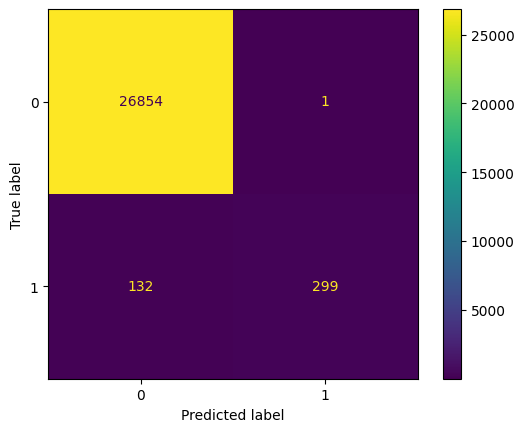

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest , ypred_ts)
cfd = ConfusionMatrixDisplay(cf ,display_labels=best_lr.classes_)
cfd.plot()

## Print Classification report 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest , ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26855
           1       1.00      0.69      0.82       431

    accuracy                           1.00     27286
   macro avg       1.00      0.85      0.91     27286
weighted avg       1.00      1.00      0.99     27286



## Plot ROC curve in train and test

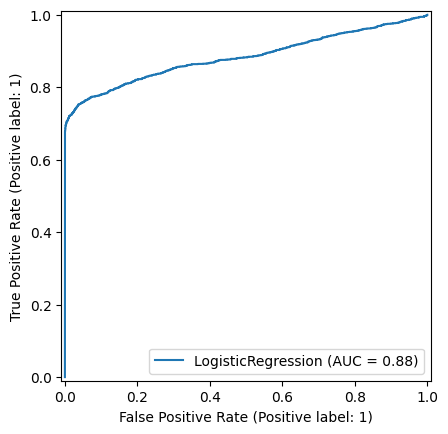

In [ ]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr , xtrain , ytrain)

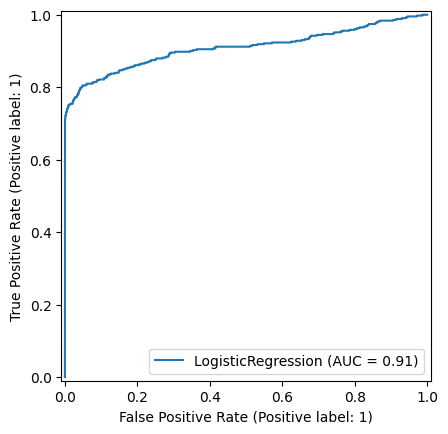

In [ ]:
RocCurveDisplay.from_estimator(best_lr , xtest , ytest)

## Use the model for out of sample prediction

In [ ]:
xnew = pd.read_csv('test.csv')

In [ ]:
xnew

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [ ]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [ ]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## Apply pre2.transform on OOS data

In [ ]:
xnew_pre = pre2.transform(xnew)
xnew_pre 

array([[-0.15375311, -0.27623953, -0.07202055, -0.04901642, -0.06303833],
       [ 1.3887435 , -1.35831267, -0.07202055, -0.04901642, -0.06303833],
       [ 0.03365302, -0.31152452, -0.07202055, -0.04901642, -0.06303833],
       ...,
       [-0.13933725,  0.12365707, -0.07202055, -0.04901642, -0.06303833],
       [ 0.09852438, -0.00572124, -0.07202055, -0.04901642, -0.06303833],
       [ 0.09852438, -0.49971115, -0.07202055, -0.04901642, -0.06303833]])

In [ ]:
xnew_pre = pd.DataFrame(xnew_pre , columns=final_cols)
xnew_pre.head()

,num__Rotational speed [rpm],num__Torque [Nm],num__HDF,num__PWF,num__OSF
0,-0.153753,-0.276240,-0.072021,-0.049016,-0.063038
1,1.388744,-1.358313,-0.072021,-0.049016,-0.063038
2,0.033653,-0.311525,-0.072021,-0.049016,-0.063038
3,-0.297912,0.852880,-0.072021,-0.049016,-0.063038
4,-0.038426,0.111895,-0.072021,-0.049016,-0.063038


## Get prediction and Probabilty of Failure 

In [ ]:
preds = best_lr.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
prob = best_lr.predict_proba(xnew_pre)[:,1]
prob

array([0.00380607, 0.00276552, 0.0038947 , ..., 0.0049378 , 0.00481536,
       0.0035061 ])

## Save the values in dataframe

In [ ]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [ ]:
df_final['Machine Failure pred'] = preds
df_final[ 'Machine Failure prob '] = prob

In [ ]:
df_final

,id,Machine Failure pred,Machine Failure prob
0,136429,0,0.003806
1,136430,0,0.002766
2,136431,0,0.003895
3,136432,0,0.007582
4,136433,0,0.005023
...,...,...,...
90949,227378,0,0.004444
90950,227379,0,0.002988
90951,227380,0,0.004938
90952,227381,0,0.004815


<Axes: xlabel='Machine Failure pred'>

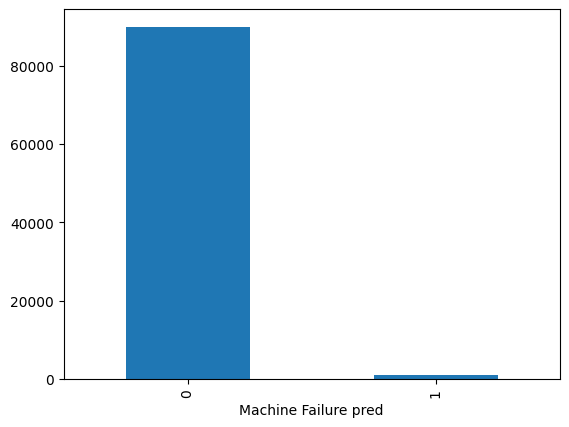

In [ ]:
df_final['Machine Failure pred'].value_counts().plot(kind = 'bar')

In [ ]:
df_final[df_final['Machine Failure pred']==1]

,id,Machine Failure pred,Machine Failure prob
17,136446,1,0.982987
209,136638,1,0.987390
223,136652,1,0.978749
397,136826,1,0.987045
405,136834,1,0.969323
...,...,...,...
90340,226769,1,0.988864
90503,226932,1,0.979117
90665,227094,1,0.993409
90784,227213,1,0.980336
